<a href="https://colab.research.google.com/gist/Devesh696/5fc36ea4d9ded3df4af08b58f85e0273/credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
sns.set()
warnings.simplefilter('ignore')

In [ ]:
data = pd.read_csv('creditcard.csv')
df = data.copy() # To keep the data as backup
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.shape

(284807, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [ ]:
df.Time.tail(15)

284792    172774.0
284793    172775.0
284794    172777.0
284795    172778.0
284796    172780.0
284797    172782.0
284798    172782.0
284799    172783.0
284800    172784.0
284801    172785.0
284802    172786.0
284803    172787.0
284804    172788.0
284805    172788.0
284806    172792.0
Name: Time, dtype: float64

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

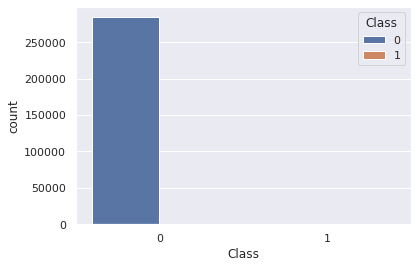

In [ ]:
sns.countplot(x=df.Class, hue=df.Class)

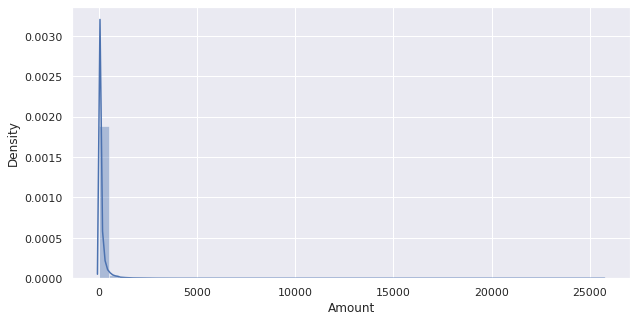

In [ ]:
plt.figure(figsize=(10, 5))
sns.distplot(df.Amount)

In [ ]:
# check version number
import imblearn
print(imblearn.__version__)

0.4.3


In [ ]:
df['Amount-Bins'] = ''

In [ ]:
def make_bins(predictor, size=50):
    '''
    Takes the predictor (a series or a dataframe of single predictor) and size of bins
    Returns bins and bin labels
    '''
    bins = np.linspace(predictor.min(), predictor.max(), num=size)

    bin_labels = []

    # Index of the final element in bins list
    bins_last_index = bins.shape[0] - 1

    for id, val in enumerate(bins):
        if id == bins_last_index:
            continue
        val_to_put = str(int(bins[id])) + ' to ' + str(int(bins[id + 1]))
        bin_labels.append(val_to_put)
    
    return bins, bin_labels

In [ ]:
bins, bin_labels = make_bins(df.Amount, size=10)

In [ ]:
df['Amount-Bins'] = pd.cut(df.Amount, bins=bins,
                           labels=bin_labels, include_lowest=True)
df['Amount-Bins'].head().to_frame()

,Amount-Bins
0,0 to 2854
1,0 to 2854
2,0 to 2854
3,0 to 2854
4,0 to 2854


In [ ]:
df['Amount-Bins'].value_counts()

0 to 2854         284484
2854 to 5709         285
5709 to 8563          28
8563 to 11418          4
11418 to 14272         3
17127 to 19982         2
22836 to 25691         1
19982 to 22836         0
14272 to 17127         0
Name: Amount-Bins, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

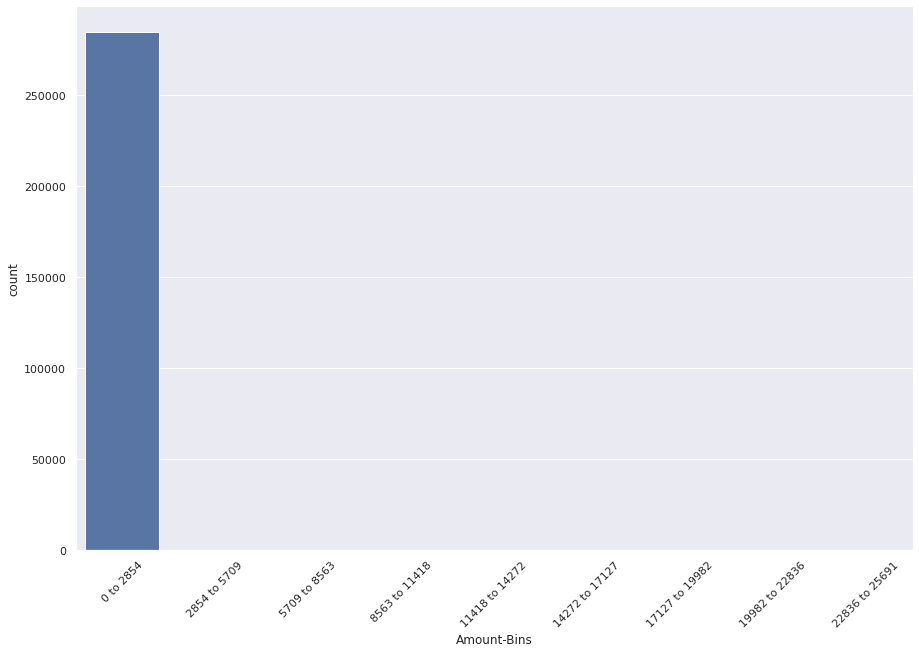

In [ ]:
plt.figure(figsize=(15, 10))
sns.countplot(x='Amount-Bins', data=df)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

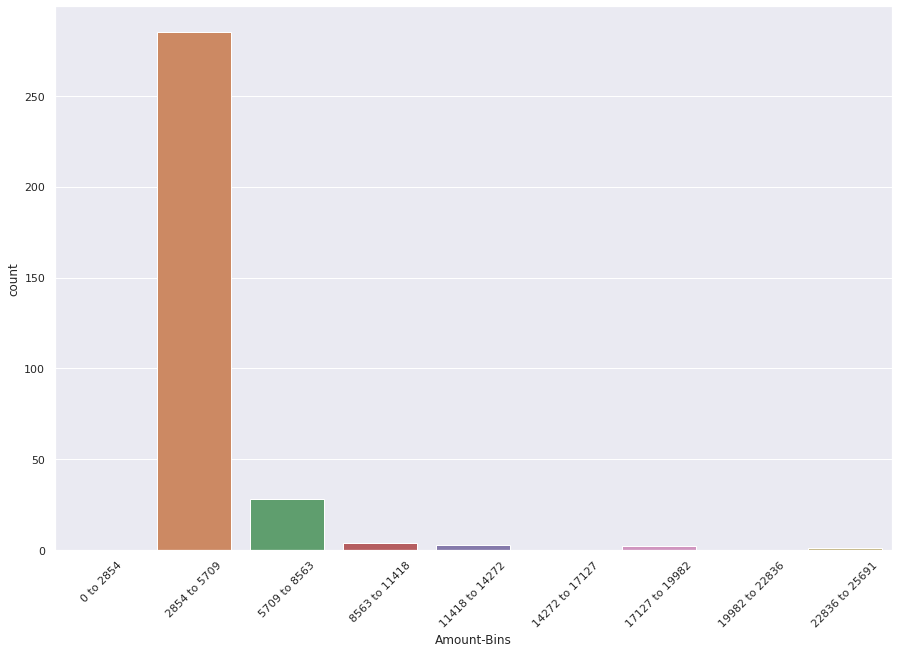

In [ ]:
plt.figure(figsize=(15, 10))
sns.countplot(x='Amount-Bins', data=df[~(df['Amount-Bins'] == '0 to 2854')])
plt.xticks(rotation=45)

In [ ]:
df_encoded = pd.get_dummies(data=df, columns=['Amount-Bins'])
df = df_encoded.copy()

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Amount-Bins_0 to 2854,Amount-Bins_2854 to 5709,Amount-Bins_5709 to 8563,Amount-Bins_8563 to 11418,Amount-Bins_11418 to 14272,Amount-Bins_14272 to 17127,Amount-Bins_17127 to 19982,Amount-Bins_19982 to 22836,Amount-Bins_22836 to 25691
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,1,0,0,0,0,0,0,0,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,1,0,0,0,0,0,0,0,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1,0,0,0,0,0,0,0,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,1,0,0,0,0,0,0,0,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,1,0,0,0,0,0,0,0,0


In [ ]:
X = df.drop(labels='Class', axis=1)
Y = df['Class']

X.shape, Y.shape

((284807, 39), (284807,))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(
    X, Y, random_state=42, test_size=0.3, shuffle=True)

print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(199364, 39) (199364,)
(85443, 39) (85443,)


Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()

In [ ]:
# Training the algorithm
lr_model.fit(xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Predictions on training and testing data
lr_pred_train = lr_model.predict(xtrain)
lr_pred_test = lr_model.predict(xtest)

In [ ]:
# Importing the required metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [ ]:
tn, fp, fn, tp = confusion_matrix(ytest, lr_pred_test).ravel()
conf_matrix = pd.DataFrame(
    {
        'Predicted Fraud': [tp, fp],
        'Predicted Not Fraud': [fn, tn]
    }, index=['Fraud', 'Not Fraud'])
conf_matrix

,Predicted Fraud,Predicted Not Fraud
Fraud,81,55
Not Fraud,23,85284


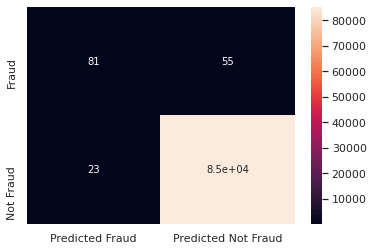

In [ ]:
sns.heatmap(conf_matrix, annot=True)

In [ ]:
lr_accuracy = accuracy_score(ytest, lr_pred_test)
lr_accuracy

0.9990871107053826

In [ ]:
lr_precision = precision_score(ytest, lr_pred_test)
lr_precision

0.7788461538461539

In [ ]:
lr_recall = recall_score(ytest, lr_pred_test)
lr_recall

0.5955882352941176

In [ ]:
lr_recall_train = recall_score(ytrain, lr_pred_train)
lr_recall_train

0.6544943820224719

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
lr_f1 = f1_score(ytest, lr_pred_test)
lr_f1

0.675

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(ytest, lr_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.78      0.60      0.68       136

    accuracy                           1.00     85443
   macro avg       0.89      0.80      0.84     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
lr_pred_test_prob = lr_model.predict_proba(xtest)[:, 1]

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
fpr, tpr, threshold = roc_curve(ytest, lr_pred_test_prob)

In [ ]:
lr_auc = roc_auc_score(ytest, lr_pred_test_prob)
lr_auc

0.8773394742449244

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8, 6))
    plt.title('ROC Curve', fontsize=15)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.xticks(np.arange(0, 1, 0.05), rotation=90)
    plt.xlabel('False Positive Rates', fontsize=15)
    plt.ylabel('True Positive Rates', fontsize=15)
    plt.legend(loc='best')
    
    plt.show()

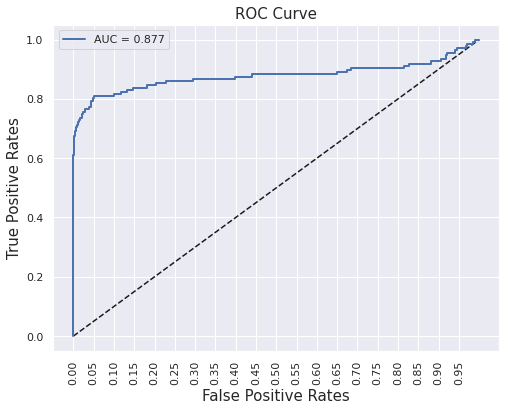

In [ ]:
plot_roc_curve(fpr=fpr, tpr=tpr, label="AUC = %.3f" % lr_auc)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# Getting the polynomial features
poly = PolynomialFeatures(degree=2)
xtrain_poly = poly.fit_transform(xtrain)
xtest_poly = poly.fit_transform(xtest)

# Training the model
model = LogisticRegression()
model.fit(xtrain_poly, ytrain)

# Getting the probabilities
train_prob = model.predict_proba(xtrain_poly)[:, 1]
test_prob = model.predict_proba(xtest_poly)[:, 1]

# Computing the ROC Score
roc_auc_score(ytrain, train_prob), roc_auc_score(ytest, test_prob)

(0.9122902475491923, 0.9238498202685249)

In [ ]:
fpr_poly, tpr_poly, threshold_poly = roc_curve(ytest, test_prob)

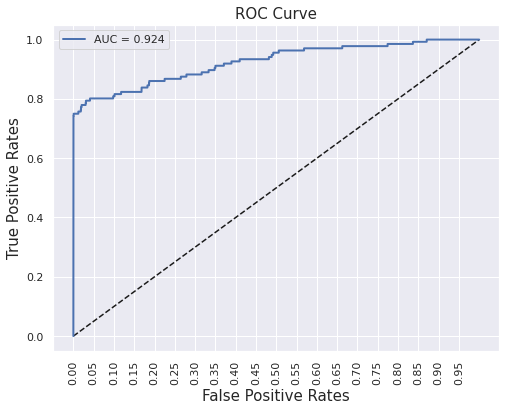

In [ ]:
plot_roc_curve(fpr=fpr_poly, tpr=tpr_poly, label='AUC = %.3f' %  roc_auc_score(ytest, test_prob))

In [ ]:
recall_score(ytest, model.predict(xtest_poly))

0.75

In [ ]:
# This is the pipeline module we need from imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline 

# Define which resampling method and which ML model to use in the pipeline
resampling = RandomUnderSampler()
model = LogisticRegression()

# Define the pipeline,and combine sampling method with the LR model
pipeline = Pipeline([('RandomUnderSampler', resampling), ('LR', model)])

pipeline.fit(xtrain, ytrain) 
predicted = pipeline.predict(xtest)

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(ytest, lr_pred_test))
conf_matrix = confusion_matrix(ytest, lr_pred_test)
print('Confusion matrix:\n', conf_matrix)

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.78      0.60      0.68       136

    accuracy                           1.00     85443
   macro avg       0.89      0.80      0.84     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85284    23]
 [   55    81]]


In [ ]:
# This is the pipeline module we need from imblearn
from imblearn.over_sampling import RandomOverSampler

# Define which resampling method and which ML model to use in the pipeline
resampling = RandomOverSampler()
model = LogisticRegression()

# Define the pipeline,and combine sampling method with the LR model
pipeline = Pipeline([('RandomOverSampler', resampling), ('LR', model)])

pipeline.fit(xtrain, ytrain) 
predicted = pipeline.predict(xtest)

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(ytest, lr_pred_test))
conf_matrix = confusion_matrix(ytest, lr_pred_test)
print('Confusion matrix:\n', conf_matrix)

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.78      0.60      0.68       136

    accuracy                           1.00     85443
   macro avg       0.89      0.80      0.84     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85284    23]
 [   55    81]]


In [ ]:
# This is the pipeline module we need from imblearn

from imblearn.over_sampling import SMOTE


# Define which resampling method and which ML model to use in the pipeline
resampling = SMOTE(sampling_strategy='auto',random_state=0)
model = LogisticRegression()

# Define the pipeline, tell it to combine SMOTE with the LR model
pipeline = Pipeline([('SMOTE', resampling), ('LR', model)])

pipeline.fit(xtrain, ytrain) 
predicted = pipeline.predict(xtest)

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(ytest, lr_pred_test))
conf_matrix = confusion_matrix(ytest, lr_pred_test)
print('Confusion matrix:\n', conf_matrix)

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.78      0.60      0.68       136

    accuracy                           1.00     85443
   macro avg       0.89      0.80      0.84     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85284    23]
 [   55    81]]


Support Vector Machine (SVM)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
mms = MinMaxScaler()

In [ ]:
# Let's first check the head of the explanatory variables which are to be scaled.
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Amount-Bins_0 to 2854,Amount-Bins_2854 to 5709,Amount-Bins_5709 to 8563,Amount-Bins_8563 to 11418,Amount-Bins_11418 to 14272,Amount-Bins_14272 to 17127,Amount-Bins_17127 to 19982,Amount-Bins_19982 to 22836,Amount-Bins_22836 to 25691
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,1,0,0,0,0,0,0,0,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1,0,0,0,0,0,0,0,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,1,0,0,0,0,0,0,0,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,1,0,0,0,0,0,0,0,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,1,0,0,0,0,0,0,0,0


In [ ]:
X_scaled = mms.fit_transform(X)

In [ ]:
X_scaled = pd.DataFrame(data=X_scaled, columns=X.columns)
X_scaled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Amount-Bins_0 to 2854,Amount-Bins_2854 to 5709,Amount-Bins_5709 to 8563,Amount-Bins_8563 to 11418,Amount-Bins_11418 to 14272,Amount-Bins_14272 to 17127,Amount-Bins_17127 to 19982,Amount-Bins_19982 to 22836,Amount-Bins_22836 to 25691
0,0.000000,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,0.510600,0.252484,0.680908,0.371591,0.635591,0.446084,0.434392,0.737173,0.655066,0.594863,0.582942,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,0.505267,0.381188,0.744342,0.486190,0.641219,0.383840,0.464105,0.727794,0.640681,0.551930,0.579530,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000006,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,0.513018,0.322422,0.706683,0.503854,0.640473,0.511697,0.357443,0.763381,0.644945,0.386683,0.585855,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000006,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,0.507585,0.271817,0.710910,0.487635,0.636372,0.289124,0.415653,0.711253,0.788492,0.467058,0.578050,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000012,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,0.524303,0.236355,0.724477,0.552509,0.608406,0.349419,0.434995,0.724243,0.650665,0.626060,0.584615,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(
    X_scaled, Y, random_state=42, test_size=0.30, shuffle=True)

In [ ]:
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(199364, 39) (199364,)
(85443, 39) (85443,)


In [ ]:
from sklearn.svm import SVC

In [ ]:
svc_model = SVC(kernel='linear', probability=True)

In [ ]:
svc_model.fit(xtrain, ytrain)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
svc_pred = svc_model.predict(xtest)

In [ ]:
svc_recall = recall_score(ytest, svc_pred)

In [ ]:
svc_recall

0.8014705882352942

In [ ]:
svc_pred_prob = svc_model.predict_proba(xtest)[:, 1]

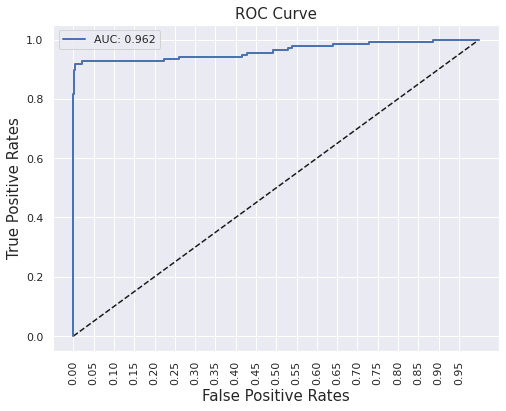

In [ ]:
# First, getting the auc score
svc_auc = roc_auc_score(ytest, svc_pred_prob)

# Now, let's get the fpr and tpr
fpr, tpr, threshold = roc_curve(ytest, svc_pred_prob)

# Now, let's draw the curve
plot_roc_curve(fpr, tpr, 'AUC: %.3f' % svc_auc)

In [ ]:
# Obtain the results from the classification report and confusion matrix 
from sklearn.metrics import  classification_report, confusion_matrix 

print('Classifcation report:\n', classification_report(ytest, svc_pred))
conf_mat = confusion_matrix(ytest, svc_pred)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.83      0.80      0.82       136

    accuracy                           1.00     85443
   macro avg       0.92      0.90      0.91     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85285    22]
 [   27   109]]


In [ ]:
# This is the pipeline module we need from imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline 

# Define which resampling method and which ML model to use in the pipeline
resampling = RandomUnderSampler()
model = SVC(kernel='linear', probability=True)

# Define the pipeline,and combine sampling method with the SVM model
pipeline = Pipeline([('RandomUnderSampler', resampling), ('SVM', model)])

pipeline.fit(xtrain, ytrain) 
predicted = pipeline.predict(xtest)

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(ytest, svc_pred))
conf_mat = confusion_matrix(ytest, svc_pred)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.83      0.80      0.82       136

    accuracy                           1.00     85443
   macro avg       0.92      0.90      0.91     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85285    22]
 [   27   109]]


Naive Bayes Algorithm

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb = GaussianNB()

In [ ]:
nb.fit(xtrain, ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
nb_pred = nb.predict(xtest)
nb_pred_proba = nb.predict_proba(xtest)[:, 1]

In [ ]:
# Obtain the results from the classification report and confusion matrix 
from sklearn.metrics import  classification_report, confusion_matrix 

print('Classifcation report:\n', classification_report(ytest, nb_pred))
conf_mat = confusion_matrix(y_true=ytest, y_pred=nb_pred)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00     85307
           1       0.00      1.00      0.00       136

    accuracy                           0.00     85443
   macro avg       0.50      0.50      0.00     85443
weighted avg       1.00      0.00      0.00     85443

Confusion matrix:
 [[   94 85213]
 [    0   136]]


In [ ]:
nb_accuracy = accuracy_score(ytest, nb_pred)
nb_accuracy

0.0026918530482309844

In [ ]:
nb_precision = precision_score(ytest, nb_pred)
nb_precision

0.001593457451171074

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
nb_f1 = f1_score(ytest, nb_pred)
nb_f1

0.0031818447680879683

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(ytest, nb_pred))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00     85307
           1       0.00      1.00      0.00       136

    accuracy                           0.00     85443
   macro avg       0.50      0.50      0.00     85443
weighted avg       1.00      0.00      0.00     85443



In [ ]:
nb_auc = roc_auc_score(ytest, nb_pred)

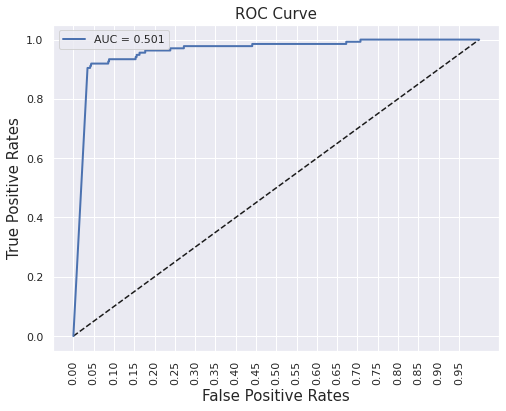

In [ ]:
fpr, tpr, threshold = roc_curve(ytest, nb_pred_proba)
plot_roc_curve(fpr, tpr, 'AUC = %.3f' % nb_auc)

In [ ]:
nb_recall = recall_score(ytest, nb_pred)
nb_recall

1.0

In [ ]:
# This is the pipeline module we need from imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline 

# Define which resampling method and which ML model to use in the pipeline
resampling = RandomUnderSampler()
model = GaussianNB()

# Define the pipeline,and combine sampling method with the NB model
pipeline = Pipeline([('RandomUnderSampler', resampling), ('NB', model)])

pipeline.fit(xtrain, ytrain) 
predicted = pipeline.predict(xtest)

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(ytest, nb_pred))
conf_mat = confusion_matrix(ytest, nb_pred)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00     85307
           1       0.00      1.00      0.00       136

    accuracy                           0.00     85443
   macro avg       0.50      0.50      0.00     85443
weighted avg       1.00      0.00      0.00     85443

Confusion matrix:
 [[   94 85213]
 [    0   136]]


In [ ]:
# This is the pipeline module we need from imblearn
from imblearn.over_sampling import RandomOverSampler

# Define which resampling method and which ML model to use in the pipeline
resampling = RandomOverSampler()
model = GaussianNB()

# Define the pipeline,and combine sampling method with the NB model
pipeline = Pipeline([('RandomOverSampler', resampling), ('NB', model)])

pipeline.fit(xtrain, ytrain) 
predicted = pipeline.predict(xtest)

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(ytest, nb_pred))
conf_mat = confusion_matrix(ytest, nb_pred)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00     85307
           1       0.00      1.00      0.00       136

    accuracy                           0.00     85443
   macro avg       0.50      0.50      0.00     85443
weighted avg       1.00      0.00      0.00     85443

Confusion matrix:
 [[   94 85213]
 [    0   136]]


In [ ]:
# This is the pipeline module we need from imblearn

from imblearn.over_sampling import SMOTE


# Define which resampling method and which ML model to use in the pipeline
resampling = SMOTE(sampling_strategy='auto',random_state=0)
model = GaussianNB()

# Define the pipeline, tell it to combine SMOTE with the NB model
pipeline = Pipeline([('SMOTE', resampling), ('NB', model)])

pipeline.fit(xtrain, ytrain) 
predicted = pipeline.predict(xtest)

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(ytest, nb_pred))
conf_mat = confusion_matrix(ytest, nb_pred)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00     85307
           1       0.00      1.00      0.00       136

    accuracy                           0.00     85443
   macro avg       0.50      0.50      0.00     85443
weighted avg       1.00      0.00      0.00     85443

Confusion matrix:
 [[   94 85213]
 [    0   136]]


Random Forest Algorithm

In [ ]:
x = data.iloc[:, 2:30].values
y = data.iloc[:,-1].values

In [ ]:
#Split the data into training and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split (x,y, test_size=0.2, random_state=0)

In [ ]:
# Training the model
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10,criterion='entropy', random_state=0)
classifier.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
# Predict Y on the test set
y_pred = classifier.predict(x_test)

In [ ]:
# Obtain the results from the classification report and confusion matrix 
from sklearn.metrics import  classification_report, confusion_matrix 

print('Classifcation report:\n', classification_report(y_test, y_pred))
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.94      0.75      0.84       101

    accuracy                           1.00     56962
   macro avg       0.97      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962

Confusion matrix:
 [[56856     5]
 [   25    76]]


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9994733330992591

In [ ]:
precision = precision_score(y_test, y_pred)
precision

0.9382716049382716

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1 = f1_score(y_test, y_pred)
f1

0.8351648351648352

In [ ]:
# This is the pipeline module we need from imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline 

# Define which resampling method and which ML model to use in the pipeline
resampling = RandomUnderSampler()
model = RandomForestClassifier(n_estimators=10,criterion='entropy', random_state=0)

# Define the pipeline,and combine sampling method with the RF model
pipeline = Pipeline([('RandomUnderSampler', resampling), ('RF', model)])

pipeline.fit(x_train, y_train) 
predicted = pipeline.predict(x_test)

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56861
           1       0.05      0.91      0.10       101

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.54     56962
weighted avg       1.00      0.97      0.98     56962

Confusion matrix:
 [[55197  1664]
 [    9    92]]


In [ ]:
# This is the pipeline module we need from imblearn
from imblearn.over_sampling import RandomOverSampler

# Define which resampling method and which ML model to use in the pipeline
resampling = RandomOverSampler()
model = RandomForestClassifier(n_estimators=10,criterion='entropy', random_state=0)

# Define the pipeline,and combine sampling method with the RF model
pipeline = Pipeline([('RandomOverSampler', resampling), ('RF', model)])

pipeline.fit(x_train, y_train) 
predicted = pipeline.predict(x_test)

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.93      0.81      0.87       101

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Confusion matrix:
 [[56855     6]
 [   19    82]]


In [ ]:
# This is the pipeline module we need from imblearn

from imblearn.over_sampling import SMOTE


# Define which resampling method and which ML model to use in the pipeline
resampling = SMOTE(sampling_strategy='auto',random_state=0)
model = RandomForestClassifier(n_estimators=10,criterion='entropy', random_state=0)

# Define the pipeline, tell it to combine SMOTE with the RF model
pipeline = Pipeline([('SMOTE', resampling), ('RF', model)])

pipeline.fit(x_train, y_train) 
predicted = pipeline.predict(x_test)

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, y_pred))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.94      0.75      0.84       101

    accuracy                           1.00     56962
   macro avg       0.97      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962

Confusion matrix:
 [[56846    15]
 [   16    85]]
